In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns

In [3]:
df18 = pd.read_csv("predictions_res18.csv")
df50 = pd.read_csv("predictions_res50.csv")
df101 = pd.read_csv("predictions_res101.csv")
label = pd.read_csv("labels.csv")

In [4]:
prediction = pd.DataFrame({
    "pred18": df18.idxmax(axis=1),
    "pred50": df50.idxmax(axis=1),
    "pred101": df101.idxmax(axis=1),
    "target": label['target']
})
prediction["pred18"] = prediction["pred18"].str.extract('(\d+)').astype(int)
prediction["pred50"] = prediction["pred50"].str.extract('(\d+)').astype(int)
prediction["pred101"] = prediction["pred101"].str.extract('(\d+)').astype(int)
print("Here's the Prediction Dataframe")
prediction.head()

Here's the Prediction Dataframe


,pred18,pred50,pred101,target
0,24,24,24,24
1,77,77,77,77
2,252,252,252,252
3,144,144,144,144
4,224,224,224,224


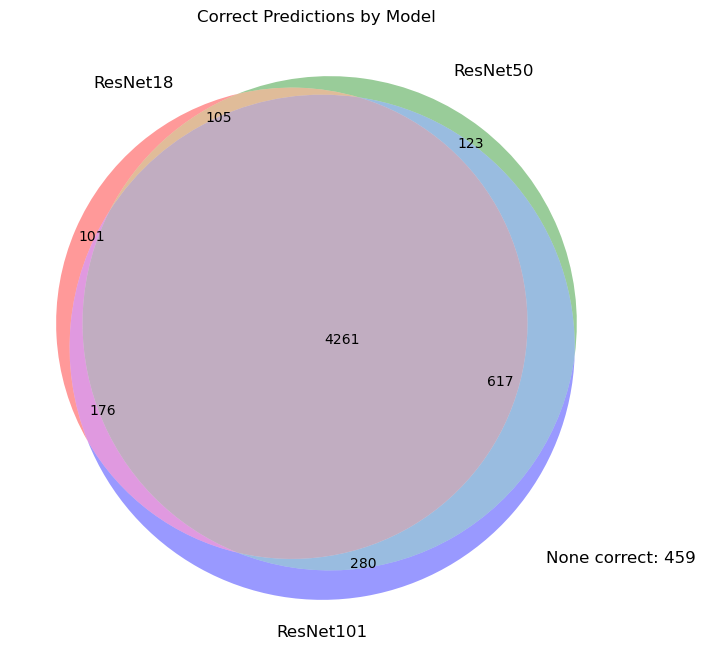

In [5]:
df = prediction
correct_18 = set(df[df['pred18'] == df['target']].index)
correct_50 = set(df[df['pred50'] == df['target']].index)
correct_101 = set(df[df['pred101'] == df['target']].index)
total_indices = set(df.index)
incorrect_all = total_indices - (correct_18 | correct_50 | correct_101)
plt.figure(figsize=(8, 8))
venn_diagram = venn3([correct_18, correct_50, correct_101], ('ResNet18', 'ResNet50', 'ResNet101'))
plt.title('Correct Predictions by Model')
plt.text(0.5, -0.5, f'None correct: {len(incorrect_all)}', fontsize=12)
plt.show()

In [22]:
print(f"sanity check: \n{len(correct_101 - correct_18)= }, \n{280 + 617 = }")

sanity check: 
len(correct_101 - correct_18)= 897, 
280 + 617 = 897


In [51]:
c18i50 = list(correct_18-correct_50)
c18i50.sort()
c18i101 = list(correct_18-correct_101)
c18i101.sort()
c50i18 = list(correct_50-correct_18)
c50i18.sort()
c50i101 = list(correct_50-correct_101)
c50i101.sort()
c101i18 = list(correct_101-correct_18)
c101i18.sort()
c101i50 = list(correct_101-correct_50)
c101i50.sort()

In [67]:
label_c18i50 = df.loc[c18i50, 'target'].apply(lambda x: f'class_{x}').tolist()
conf_18_c18i50 = np.zeros(len(c18i50))
conf_50_c18i50 = np.zeros(len(c18i50))
for i in range(len(c18i50)):
    conf_18_c18i50[i] = df18.loc[c18i50[i],label_c18i50[i]]
    conf_50_c18i50[i] = df50.loc[c18i50[i],label_c18i50[i]]
print("For Test Images where res18 is correct and res50 is incorrect:")
print(f"{conf_18_c18i50.mean() = }")
print(f"{conf_50_c18i50.mean() = }")

For Test Images where res18 is correct and res50 is incorrect:
conf_18_c18i50.mean() = 0.23958990948014441
conf_50_c18i50.mean() = 0.10911140865523467


In [69]:
label_c18i101 = df.loc[c18i101, 'target'].apply(lambda x: f'class_{x}').tolist()
conf_18_c18i101 = np.zeros(len(c18i101))
conf_101_c18i101 = np.zeros(len(c18i101))
for i in range(len(c18i101)):
    conf_18_c18i101[i] = df18.loc[c18i101[i],label_c18i101[i]]
    conf_101_c18i101[i] = df101.loc[c18i101[i],label_c18i101[i]]
print("For Test Images where res18 is correct and res101 is incorrect:")
print(f"{conf_18_c18i101.mean() = }")
print(f"{conf_101_c18i101.mean() = }")

For Test Images where res18 is correct and res101 is incorrect:
conf_18_c18i101.mean() = 0.24117067444660195
conf_101_c18i101.mean() = 0.11417676633174757


In [70]:
label_c50i18 = df.loc[c50i18, 'target'].apply(lambda x: f'class_{x}').tolist()
conf_18_c50i18 = np.zeros(len(c50i18))
conf_50_c50i18 = np.zeros(len(c50i18))
for i in range(len(c50i18)):
    conf_18_c50i18[i] = df18.loc[c50i18[i],label_c50i18[i]]
    conf_50_c50i18[i] = df50.loc[c50i18[i],label_c50i18[i]]
print("For Test Images where res50 is correct and res18 is incorrect:")
print(f"{conf_50_c50i18.mean() = }")
print(f"{conf_18_c50i18.mean() = }")

For Test Images where res50 is correct and res18 is incorrect:
conf_18_c50i18.mean() = 0.05246786488577027
conf_50_c50i18.mean() = 0.46921961838648646
